In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('non-linear.csv')
data.head()

,y,x
0,97.58776,1.0
1,97.76344,2.0
2,96.56705,3.0
3,92.52037,4.0
4,91.15097,5.0


In [3]:
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

train_x = np.array(train_data['x'])
train_y = np.array(train_data['y'])

test_x = np.array(test_data['x'])
test_y = np.array(test_data['y'])

In [16]:
def generate_polynomial(data, degree):
    poly_data = np.vstack(list(data ** d for d in range(1, 1+degree)))
    return np.vstack((data, poly_data))

def generate_sinusoid(data, degree):
    sin_data = np.vstack(list(np.sin(data * d) for d in range(1, 1+degree)))
    return np.vstack((data, sin_data))

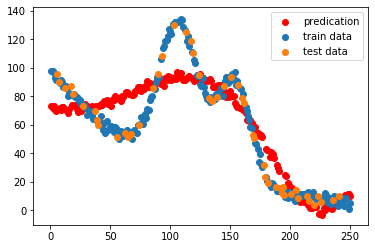

In [22]:
Y = train_y
# create new features from x
poly_data = generate_polynomial(train_x, 15)
sin_data = generate_sinusoid(train_x, 15)
X = np.vstack((train_x, poly_data, sin_data))
m = len(train_x)
X = np.vstack((np.ones(m), X))
X = X.T

W = np.array([np.random.rand() for _ in range(X.shape[1])])

# normalize
for wi in range(len(W)):
    X[:, wi] /= X[:, wi].max()

# TODO: Result not nice

num_iters = 100000
lr = 0.1
for i in np.arange(1, 1+num_iters):
    diff = X @ W - Y
    for wi in range(len(W)):
        # update using derivative
        k = diff if wi == 0 else diff * X[:, wi]
        W[wi] -= lr * np.sum(k) / m
    
    if i % 10000 == 0:
        cost = np.square(diff).sum() / 2 / m
        print(f'iteration={i} cost={cost}', end='\r')

        
y = X @ W
plt.scatter(train_x, y, color='red', label='predication')
plt.scatter(train_x, train_y, label='train data')
plt.scatter(test_x, test_y, label='test data')
plt.legend()
plt.show()